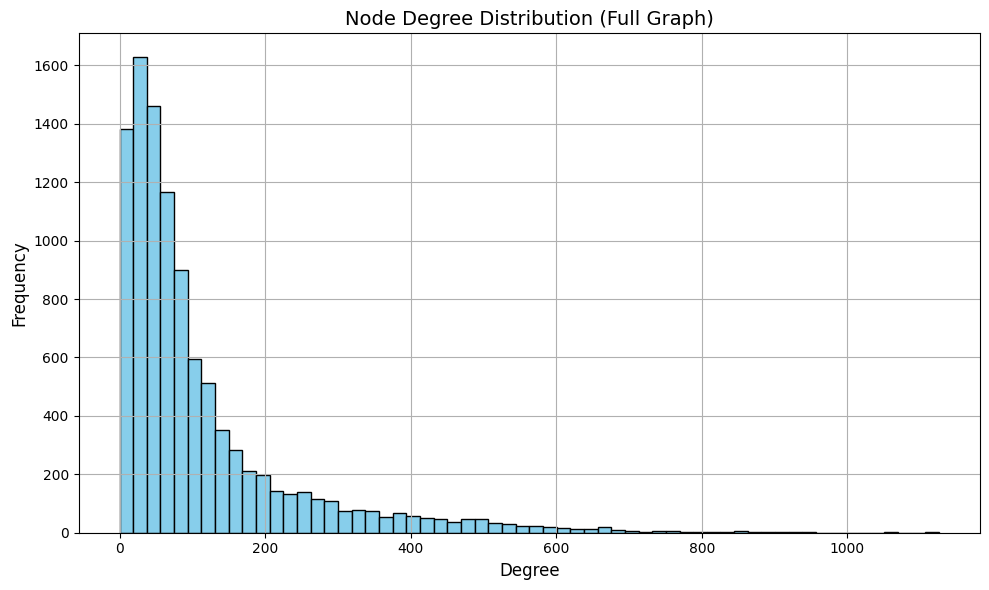

C:\Users\dell\AppData\Local\Temp\ipykernel_3824\1193674822.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


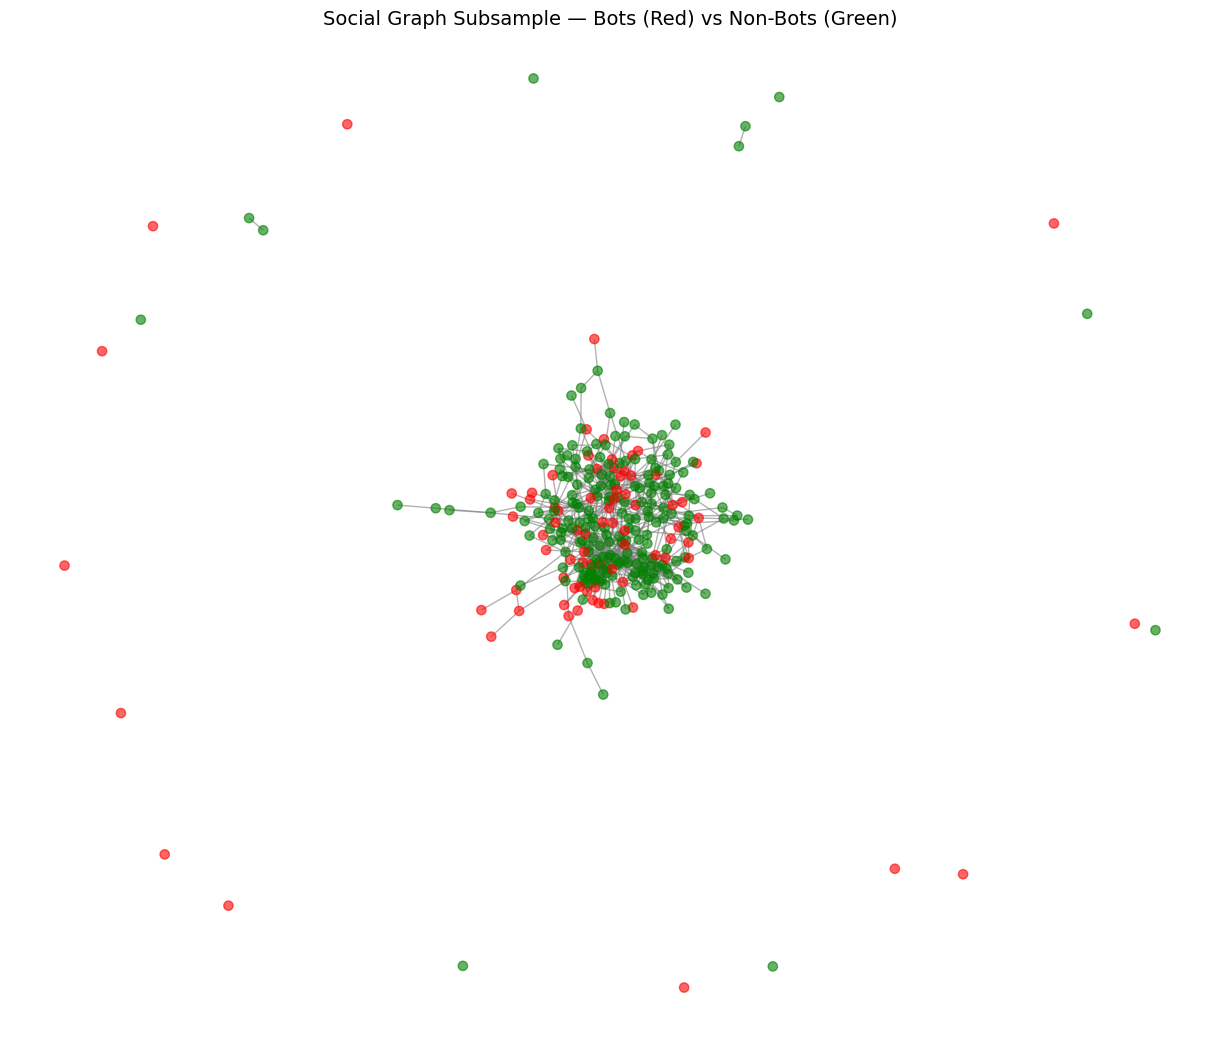

In [3]:
from pathlib import Path
import torch
from torch.serialization import add_safe_globals
from torch_geometric.data.data import DataEdgeAttr

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from torch_geometric.utils import to_networkx, degree

repo_root = Path().resolve().parent
data_path = repo_root / "data" / "processed" / "cleaned_data.pt"

# Allow this custom class for safe loading
add_safe_globals([DataEdgeAttr])

# Load the full graph object
data = torch.load(data_path, weights_only=False)

# Degree Distribution (Full Graph)

deg_full = degree(data.edge_index[0], num_nodes=data.num_nodes).numpy()

plt.figure(figsize=(10, 6))
plt.hist(deg_full, bins=60, color='skyblue', edgecolor='black')
plt.title("Node Degree Distribution (Full Graph)", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualize a Small Subgraph (300 nodes)

subset = torch.arange(300)
data_sub = data.subgraph(subset)
G = to_networkx(data_sub, to_undirected=True)

# Color by bot/non-bot labels (red = bot, green = non-bot)
colors = ['red' if y == 1 else 'green' for y in data_sub.y_bot.numpy()]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=colors, node_size=45, edge_color="gray", alpha=0.6)
plt.title("Social Graph Subsample — Bots (Red) vs Non-Bots (Green)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


In [4]:
import json
from pathlib import Path
import torch
from torch.serialization import add_safe_globals
from torch_geometric.data.data import DataEdgeAttr
from torch_geometric.utils import to_networkx

# Allow safe loading
add_safe_globals([DataEdgeAttr])

# Load data
repo_root = Path().resolve().parent
data_path = repo_root / "data" / "processed" / "cleaned_data.pt"
data = torch.load(data_path, weights_only=False)

# Subset 300 nodes to keep it lightweight
subset = torch.arange(300)
data_sub = data.subgraph(subset)
G = to_networkx(data_sub, to_undirected=True)

# JSON format
nodes = []
for n in G.nodes():
    label = int(data_sub.y_bot[n]) if hasattr(data_sub, "y_bot") else 0
    nodes.append({
        "id": n,
        "group": label,
        "label": f"Node {n}"
    })

edges = [{"source": int(u), "target": int(v)} for u, v in G.edges()]

graph_data = {
    "nodes": nodes,
    "links": edges
}

# Output as vis_d3.json
output_json = repo_root / "visualizations" / "d3_graph.json"
output_json.parent.mkdir(exist_ok=True)
with open(output_json, "w") as f:
    json.dump(graph_data, f, indent=2)

print(f"Graph saved to {output_json}")


Graph saved to C:\Users\dell\Desktop\social-botnet-analytics-main\visualizations\d3_graph.json
